# Linear Regression

In [ ]:
import numpy as np
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('./housing.csv', header=None, delimiter=r'\s+', names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(df.iloc[:, :13])
y = np.array(df.MEDV)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression

module = LinearRegression()

module.fit(X_train, y_train)

pred_lr = module.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(pred_lr, y_test, squared=False)

print(f"error for Linear reggression {mse_lr}")

error for Linear reggression 5.540490745781336


# Naive Bayes

In [ ]:
import numpy as np
import pandas as pd


string_columns = ['workclass', 'education',	'maritalstatus',	'occupation','relationship',	'race',	'sex', 'native']

salarydata_train = pd.read_csv('SalaryData_Train.csv')
salarydata_test = pd.read_csv('SalaryData_Test.csv')

In [ ]:
salarydata_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in string_columns:
  salarydata_train[i] = le.fit_transform(salarydata_train[i])
  salarydata_test[i] = le.fit_transform(salarydata_test[i])

In [ ]:
X_train = np.array(salarydata_train.iloc[: , :13])
X_test = np.array(salarydata_train.iloc[: , :13])
y_train = np.array(salarydata_train.Salary)
y_test = np.array(salarydata_train.Salary)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_gnb = confusion_matrix(y_test, clf_pred)

print(cm_gnb)
print('Accuracy', (21505 + 2483) / (21505 + 2483 + 5025 + 1148))

[[21505  1148]
 [ 5025  2483]]
Accuracy 0.7953317197705646


# KNN Algorithm

In [ ]:
import numpy as np
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.csv', header=None, delimiter=r'\s+', names = column_names)

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(df.iloc[:, :13])
y = np.array(df.MEDV)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(4)
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

mse = mean_squared_error(model_pred, y_test, squared = False)
print(f"{i} error for K-NN {mse}")

49 error for K-NN 7.004019640065342


In [ ]:
from sklearn.metrics import mean_squared_error

for i in range(1,50):
  model = KNeighborsRegressor(i)
  model.fit(X_train, y_train)
  model_pred = model.predict(X_test)
  mse = mean_squared_error(model_pred, y_test, squared = False)
  print(f"{mse} error for k = {i}")

7.97154478854566 error for k = 1
7.159484875618533 error for k = 2
7.014927171138291 error for k = 3
7.004019640065342 error for k = 4
7.036131375752027 error for k = 5
7.103650686103268 error for k = 6
7.249246229196143 error for k = 7
7.278466403768686 error for k = 8
7.490296733721186 error for k = 9
7.573928228851226 error for k = 10
7.580880154071545 error for k = 11
7.620709624858009 error for k = 12
7.702433441773159 error for k = 13
7.745706188130712 error for k = 14
7.855546909761407 error for k = 15
7.970845764140948 error for k = 16
8.00708692880329 error for k = 17
8.05951400020052 error for k = 18
8.105972848197592 error for k = 19
8.171623447622684 error for k = 20
8.208766061680672 error for k = 21
8.266010100575647 error for k = 22
8.280897264278922 error for k = 23
8.326448746059764 error for k = 24
8.38105978099617 error for k = 25
8.410954693047014 error for k = 26
8.478704509976565 error for k = 27
8.50999986845734 error for k = 28
8.538275555508479 error for k = 29

# Support Vector Machines

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, [2, 3]].values
y = df.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC

clasifier_rbf = SVC(kernel='rbf', random_state=0)
clasifier_rbf.fit(X_train, y_train)

clasifier_rbf_pred = clasifier_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cmf_rbf = confusion_matrix(clasifier_rbf_pred, y_test)
print(cmf_rbf)

[[64  3]
 [ 4 29]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clasifier_rbf_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Random Forest Algorithm


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('Position_Salaries.csv')

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = np.array(df.iloc[:, 1:2])
y = np.array(df.Salary)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = model.predict([[6.5]])

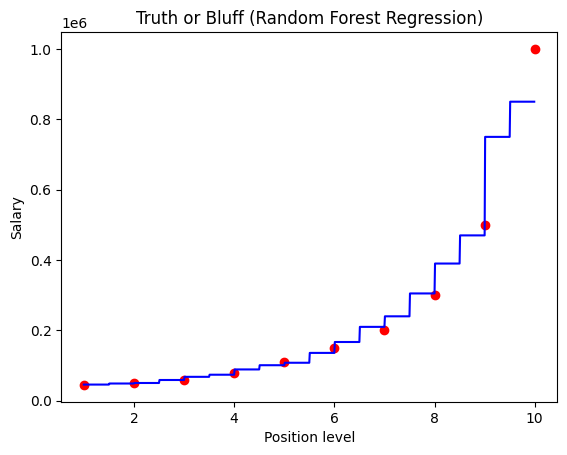

In [ ]:
import matplotlib.pyplot as plt

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()